# Differentiated Thyroid Cancer Recurrence - EDA (Exploratory Data Analysis)

Bu analizde, tiroid kanseri hastalarında **nüks (recurred)** durumunun yaş, cinsiyet, risk sınıfı, tümör tipi gibi faktörlerle ilişkisini inceliyoruz.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  

In [3]:
df = pd.read_csv("thyroid_data.csv")
df.head()
print(df.head())

print("\n[VERİ TİPLERİ]")
print(df.info())

print("\n[EKSİK VERİLER]")
print(df.isnull().sum())

print("\n[RECURRED DAĞILIMI]")
print(df["Recurred"].value_counts())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

### Veri Yapısı ve Eksik Değerler

- Veri setinde ilk 5 satır yukarıda görüntülenmiştir.
- Eksik değer kontrolü yapılmıştır.
- Hedef değişkenimiz: **Recurred** (nüks durumu)


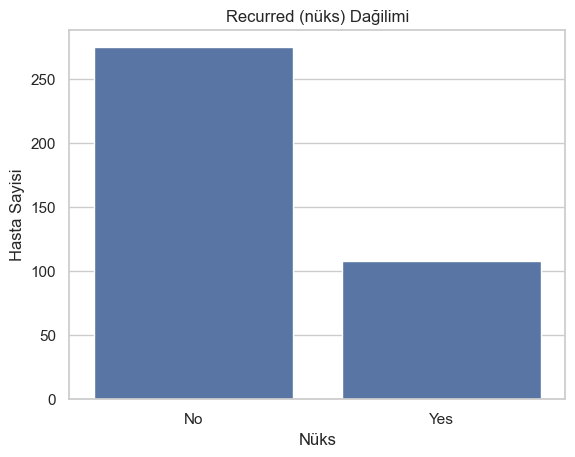

In [5]:
sns.countplot(x="Recurred", data=df)
plt.title("Recurred (nüks) Dağilimi") 
plt.xlabel("Nüks")                       # nüks dağilimi
plt.ylabel("Hasta Sayisi")
plt.show()


In [6]:
print(df["Recurred"].value_counts())


Recurred
No     275
Yes    108
Name: count, dtype: int64


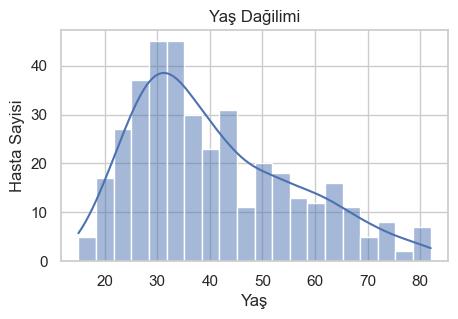

In [7]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="Age", kde=True, bins=20)
plt.title("Yaş Dağilimi")                          # yaş dagilimi
plt.xlabel("Yaş")
plt.ylabel("Hasta Sayisi")
plt.show()


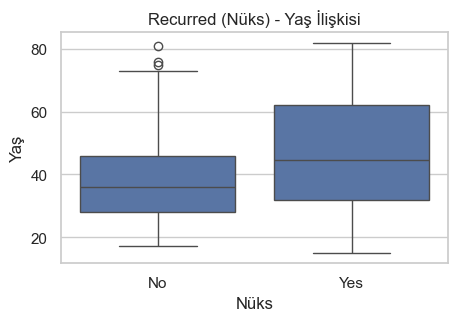

In [8]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="Recurred", y="Age", data=df)       
plt.title("Recurred (Nüks) - Yaş İlişkisi")         # nükse göre yaş kutu grafigi
plt.xlabel("Nüks")
plt.ylabel("Yaş")
plt.show()


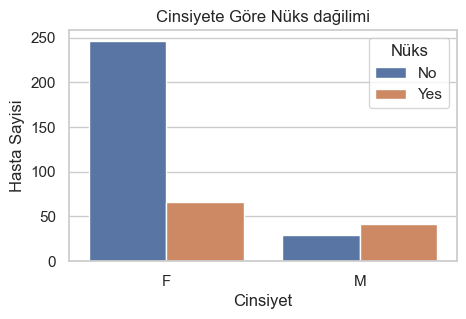

In [9]:
plt.figure(figsize=(5, 3))
sns.countplot(x="Gender", hue="Recurred", data=df)
plt.title("Cinsiyete Göre Nüks dağilimi")            
plt.xlabel("Cinsiyet")                              # cinsiyete göre nüks dağilimi
plt.ylabel("Hasta Sayisi")
plt.legend(title="Nüks")
plt.show()

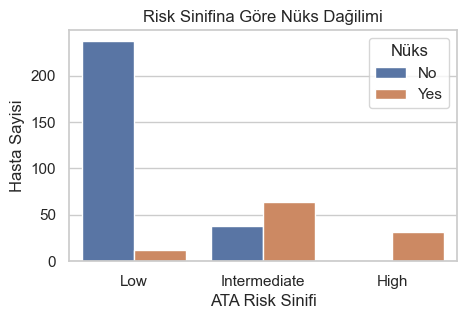

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(x="Risk", hue="Recurred", data=df)
plt.title("Risk Sinifina Göre Nüks Dağilimi")       # risk sınıfına göre nüks dağilimi
plt.xlabel("ATA Risk Sinifi")
plt.ylabel("Hasta Sayisi")
plt.legend(title="Nüks")
plt.show()

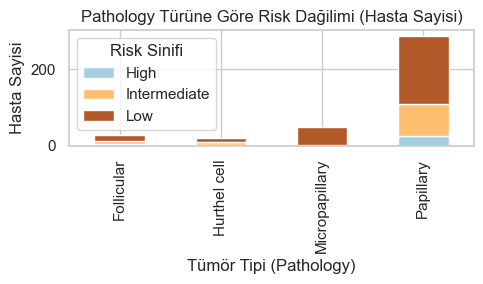

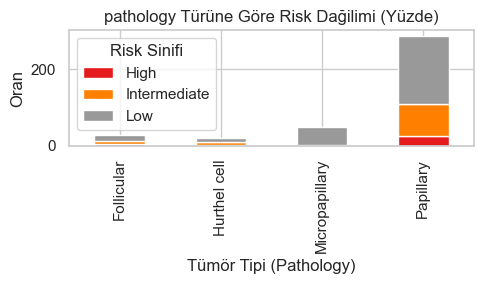

In [11]:
ct = pd.crosstab(df["Pathology"], df["Risk"])
ct.plot(kind="bar", stacked=True, figsize=(5, 3),colormap="Paired")

plt.title("Pathology Türüne Göre Risk Dağilimi (Hasta Sayisi)")    
plt.xlabel("Tümör Tipi (Pathology)")                            # pathology vs risk sayı bazlı
plt.ylabel("Hasta Sayisi")
plt.legend(title="Risk Sinifi")
plt.tight_layout()
plt.show()

ct_pct = ct.div(ct.sum(axis=1), axis=0)  # her satırı yüzdeye ceviriyor unutma
ct.plot(kind="bar", stacked=True, figsize=(5, 3), colormap="Set1")
plt.title("pathology Türüne Göre Risk Dağilimi (Yüzde)")
plt.xlabel("Tümör Tipi (Pathology)")                           
plt.ylabel("Oran")                                         # pathology vs risk yüzde bazlı
plt.legend(title="Risk Sinifi")
plt.tight_layout()
plt.show()


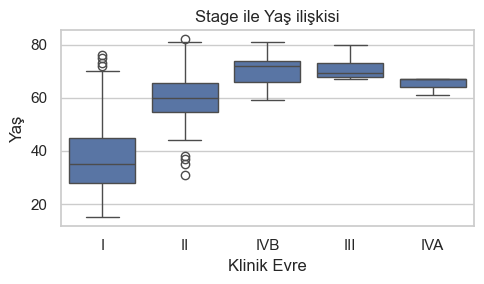

In [12]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="Stage", y="Age", data=df)
plt.title("Stage ile Yaş ilişkisi")          # evre vs yaş
plt.xlabel("Klinik Evre")
plt.ylabel("Yaş")
plt.tight_layout()
plt.show()

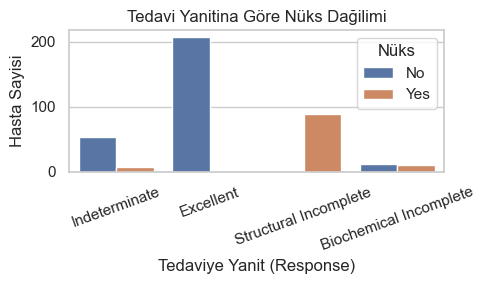

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(x="Response", hue="Recurred", data=df)

plt.title("Tedavi Yanitina Göre Nüks Dağilimi")     
plt.xlabel("Tedaviye Yanit (Response)")
plt.ylabel("Hasta Sayisi")                # response(yanit) vs recurred(nüks)
plt.legend(title="Nüks")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

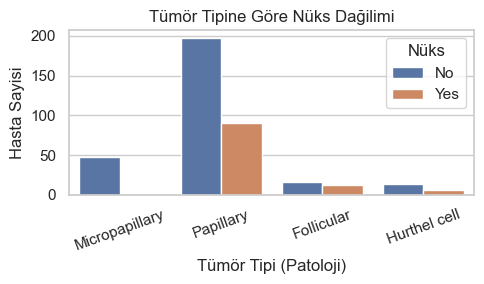

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(x="Pathology", hue="Recurred", data=df)
plt.title("Tümör Tipine Göre Nüks Dağilimi")
plt.xlabel("Tümör Tipi (Patoloji)")             # tümör tipi nüks ilişkisi
plt.ylabel("Hasta Sayisi")
plt.legend(title="Nüks")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [16]:
bins = [0, 30, 50, 80]
labels=["Genç (0-30)", "Orta (31-50)", "Yaşli (51-80)"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)    # yaş grupları oluşturduk

df[["Age", "Age_Group"]].head(10)

,Age,Age_Group
0,27,Genç (0-30)
1,34,Orta (31-50)
2,30,Genç (0-30)
3,62,Yaşli (51-80)
4,62,Yaşli (51-80)
5,52,Yaşli (51-80)
6,41,Orta (31-50)
7,46,Orta (31-50)
8,51,Yaşli (51-80)
9,40,Orta (31-50)


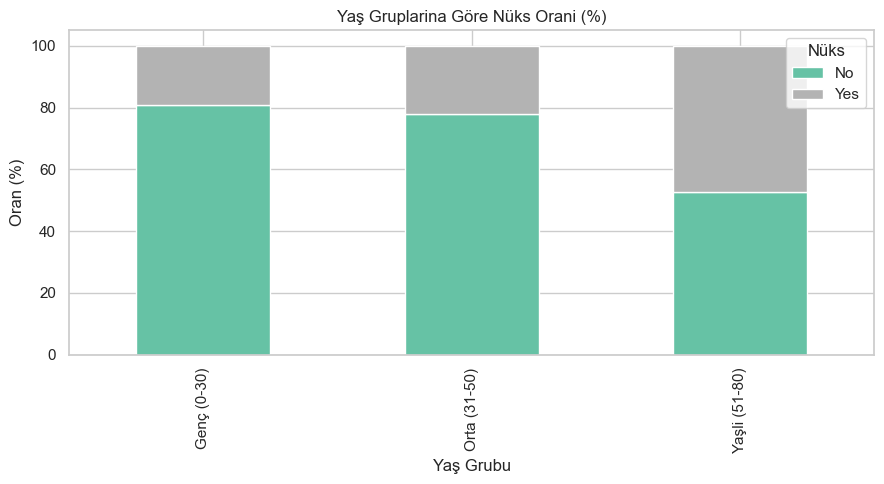

In [17]:
age_recurred_pct = pd.crosstab(df["Age_Group"], df["Recurred"], normalize='index')*100

age_recurred_pct.plot(kind="bar", stacked=True, colormap="Set2", figsize=(9,5))

plt.title("Yaş Gruplarina Göre Nüks Orani (%)")
plt.xlabel("Yaş Grubu")
plt.ylabel("Oran (%)")                                              # yaş gruplarına göre nüks oranı
plt.legend(title="Nüks")
plt.tight_layout()
plt.show()

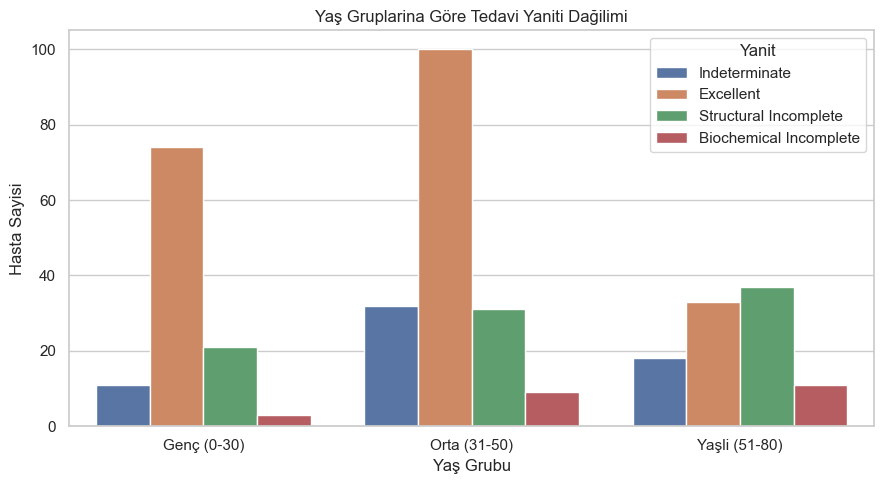

In [18]:
plt.figure(figsize=(9, 5))
sns.countplot(x="Age_Group", hue="Response", data=df)
plt.title("Yaş Gruplarina Göre Tedavi Yaniti Dağilimi")
plt.xlabel("Yaş Grubu")                             
plt.ylabel("Hasta Sayisi")                        # Yaş grubu vs response
plt.legend(title="Yanit")
plt.tight_layout()      
plt.show()

